# Lone Project

# Business Problem Understanding

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel(r"D:\Datascience\LoanData.xlsx")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Data Understanding

1 . Loan_ID : Unique Loan ID

2 . Gender : Male/Female

3 . Married : Applicant married

4 . Dependents : Number of dependents

5 . Education : Applicant Education

6 . Self_Employed : Whether the applicant in Self employed

7 . ApplicantIncome : Applicant income

8 . CoapplicantIncome : Coapplicant income

9 . LoanAmount : Loan amount in thousands

10 . Loan_Amount_Term : Term of loan in months

11 . Credit_History : credit history meets guidelines

12 . Property_Area : Urban/Semi Urban/Rural

13 . Loan_Status : Loan approved target variable

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
# The nunique() method returns the number of unique values for each column.
data["Loan_ID"].nunique() 
# There is no use of This column because every record is a diferent.
# So, we should drop this column.

614

# Drop unimportant columns as per feature selection (Filter Methods)

In [6]:
data.drop(columns=["Loan_ID"],inplace=True) # Lone_ID was droped.

In [7]:
data # Loan_ID was dropped.

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
data["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [9]:
data["Gender"].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [10]:
data["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
data["Married"].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [12]:
data["Dependents"].unique()

array([0, 1, 2, '3+', nan], dtype=object)

In [13]:
data["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [14]:
data["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [15]:
data["Education"].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [16]:
data["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [17]:
data["Self_Employed"].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

# Create new columns as per requirements

In [18]:
data["Income"] = data["ApplicantIncome"] + data["CoapplicantIncome"] 
# here created a new columan as Income and both ApplicantIncome and CoapplicantIncome was combined and stored in Income column

In [19]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


In [20]:
data.drop(columns=["ApplicantIncome","CoapplicantIncome"],inplace=True)
# Here we Droped the individual ApplicantIncome, CoapplicantIncome in this place we kept the combined data income

In [21]:
data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360.0,1.0,Rural,Y,2900.0
610,Male,Yes,3+,Graduate,No,40.0,180.0,1.0,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,Y,7583.0


In [22]:
data["Income"].describe() # Income is a continues variable so we used the describe function

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Income, dtype: float64

In [23]:
data["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [24]:
data["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [25]:
data["Credit_History"].unique() 

array([ 1.,  0., nan])

In [26]:
data["Credit_History"] = data["Credit_History"].replace({1:"good",0:"bad"})

In [27]:
data["Credit_History"].unique()

array(['good', 'bad', nan], dtype=object)

In [28]:
data["Credit_History"].value_counts()

Credit_History
good    475
bad      89
Name: count, dtype: int64

In [29]:
data["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [30]:
data["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [31]:
data["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [32]:
data["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [33]:
continous=["Income","LoanAmount"]

discrete_categorical = ["Gender","Married","Education","Self_Employed","Credit_History","Property_Area","Loan_Status"]

discrete_count = ["Dependents","Loan_Amount_Term"]

In [34]:
data.dtypes

Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History       object
Property_Area        object
Loan_Status          object
Income              float64
dtype: object

# Exploratory Data Analysis (EDA)

# For continous variables

In [35]:
data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,Male,No,0,Graduate,No,NaN,360.0,good,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,good,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,good,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,good,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,good,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360.0,good,Rural,Y,2900.0
610,Male,Yes,3+,Graduate,No,40.0,180.0,good,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,253.0,360.0,good,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,187.0,360.0,good,Urban,Y,7583.0


In [36]:
data[continous].describe()
# describe function apply only on the continous variable.

,Income,LoanAmount
count,614.000000,592.000000
mean,7024.705081,146.412162
std,6458.663872,85.587325
min,1442.000000,9.000000
25%,4166.000000,100.000000
50%,5416.500000,128.000000
75%,7521.750000,168.000000
max,81000.000000,700.000000


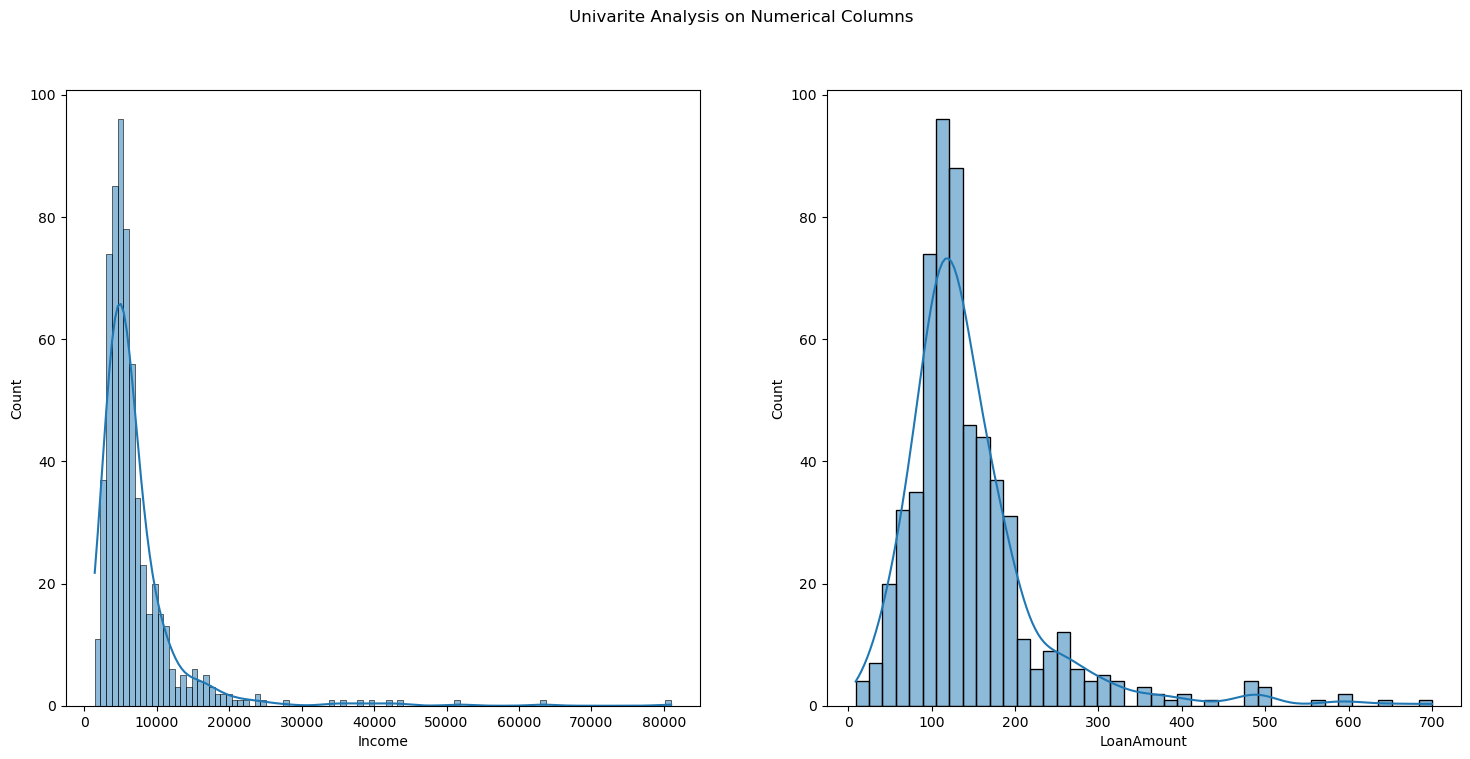

In [37]:
# check the histogram

# for each continous variable we check the histogram.

plt.rcParams["figure.figsize"]=(18,8)

# Check for Income.
plt.subplot(1,2,1)  # (rows,columns,place)
sns.histplot(data["Income"],kde=True)


# Check for LoanAmount.
plt.subplot(1,2,2)  # (rows,columns,place)
sns.histplot(data["LoanAmount"],kde=True)

# Subtitle for the plots
plt.suptitle("Univarite Analysis on Numerical Columns")
plt.show()

In [38]:
data[continous].skew()  # It is right skew because right side very less values are there.

Income        5.633449
LoanAmount    2.677552
dtype: float64

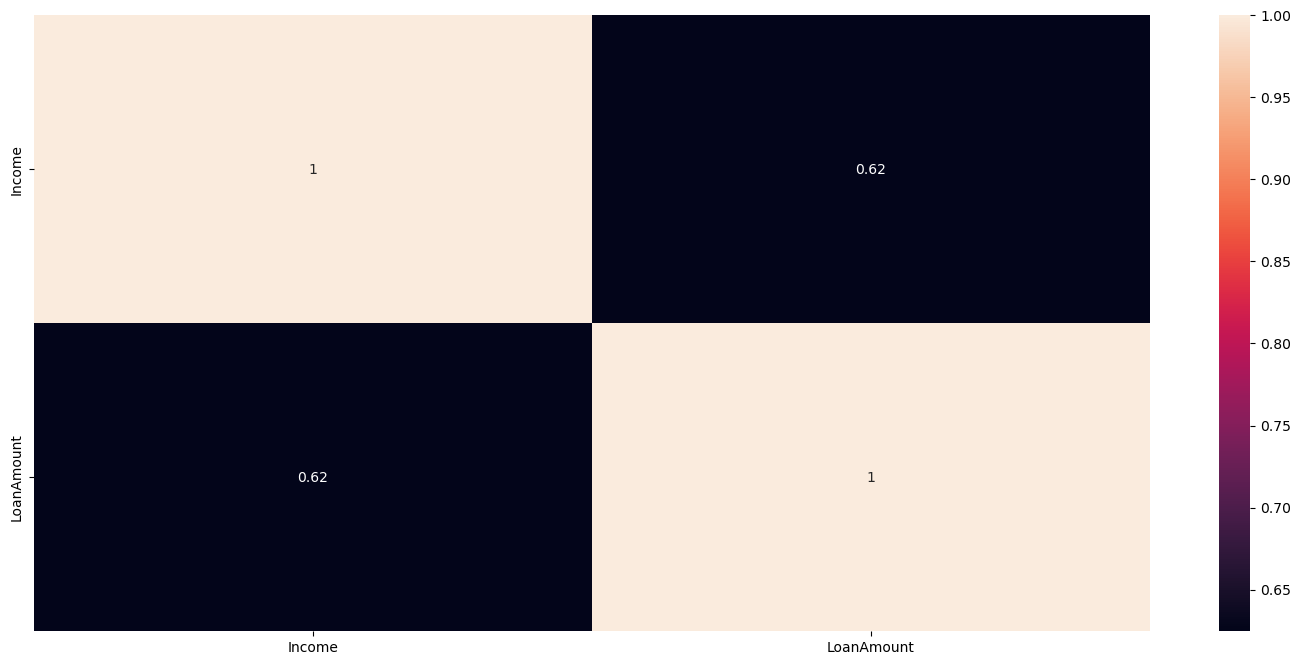

In [39]:
# Check the correlation matrix apply only for continous variable.

# For that here we applying the heatmap

sns.heatmap(data[continous].corr(),annot=True)
plt.show()

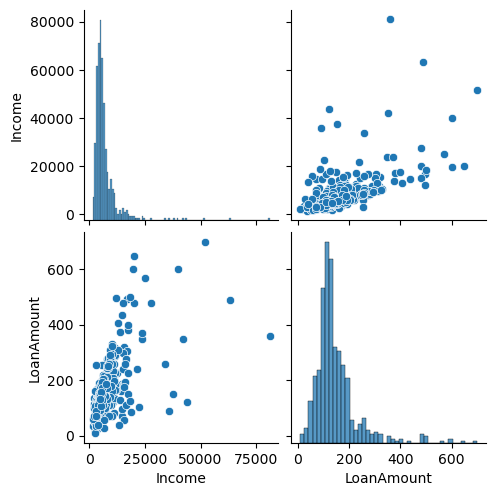

In [40]:
# for continous how many plots are there all we should be applyed.

sns.pairplot(data[continous])
plt.show()

# For Discrete variables

In [41]:
data[discrete_categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,good,Semiurban,Y
freq,489,398,480,500,475,233,422


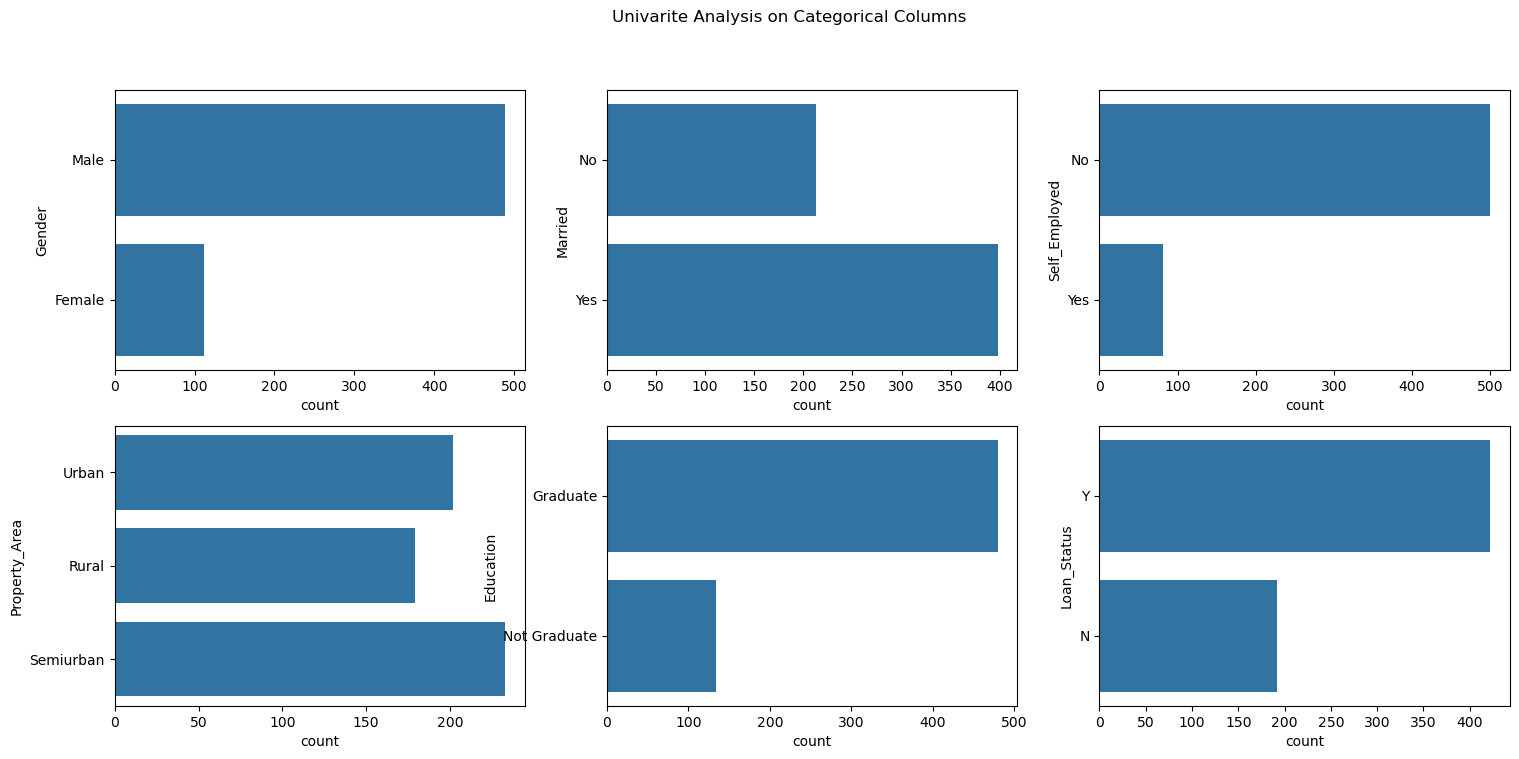

In [42]:
plt.rcParams["figure.figsize"]=(18,8)

plt.subplot(2, 3, 1)      # (rows , columns , place)
sns.countplot(data["Gender"])

plt.subplot(2, 3, 2)      # (rows , columns , place)
sns.countplot(data["Married"])

plt.subplot(2, 3, 3)      # (rows , columns , place)
sns.countplot(data["Self_Employed"])

plt.subplot(2, 3, 4)      # (rows , columns , place)
sns.countplot(data["Property_Area"])

plt.subplot(2, 3, 5)      # (rows , columns , place)
sns.countplot(data["Education"])

plt.subplot(2, 3, 6)      # (rows , columns , place)
sns.countplot(data["Loan_Status"])

plt.suptitle("Univarite Analysis on Categorical Columns")
plt.show()

# Check for Missing Values

In [43]:
data.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [44]:
data.isnull().sum()/len(data)*100
# Here i'am having everything is lessthen 10% only so, no need to drop any columan based on the missing values

Gender              2.117264
Married             0.488599
Dependents          2.442997
Education           0.000000
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
Property_Area       0.000000
Loan_Status         0.000000
Income              0.000000
dtype: float64

# Check for Skewness

In [45]:
data[continous].skew()

Income        5.633449
LoanAmount    2.677552
dtype: float64

# Check Outliers

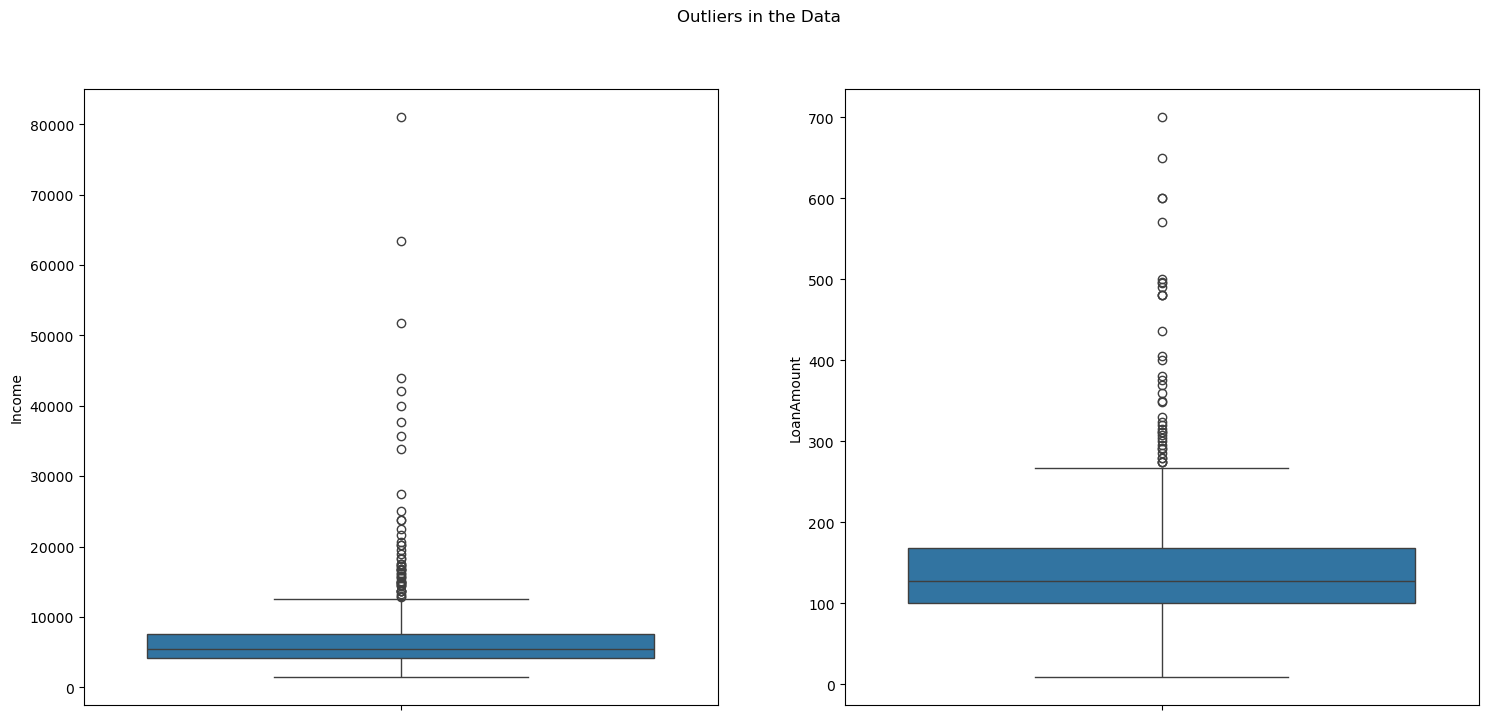

In [46]:
# Lets visualize the outliers using box plot

plt.subplot(1,2,1)
sns.boxplot(data["Income"])

plt.subplot(1,2,2)
sns.boxplot(data["LoanAmount"])

plt.suptitle("Outliers in the Data")
plt.show()

. if outliers are there we have the 3 option

. Remove

. Replace

. Retrain

# Stage - 3 : Data Preparation

1 . Data Cleaning

. Wrong data

. Missing values

. duplicates

. outliers

2 . Data Wrangling

. transformation (applicable on continous)

. scaling (applicable on continous)

. encoding (applicable on discrete categorical)

. Dont apply any data wrangling techniwue on count variable

# Wrong Data treatment

In [47]:
data["Dependents"]=data["Dependents"].replace({"3+":3})

# Missing values Treatment

In [48]:
data["Dependents"]=data["Dependents"].fillna(0)

# Gender,Married,Self_Employed is a discrete_categorical so i am used here mode 
# by the end we have to use Zero because, Multiple modes are possible mean and median only can be one.
# so, here first mode index will be selected as zero mode()[0]

data["Gender"] = data["Gender"].fillna(data["Gender"].mode()[0])
data["Married"] = data["Married"].fillna(data["Married"].mode()[0])
data["Self_Employed"] = data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])

# We have to replace only orginal data never replace with the statical data.
# because if a persion is having bad registry to good registry also it is goin to impact more.

data = data.dropna(subset=["Income","LoanAmount","Loan_Amount_Term","Credit_History"])



# data type conversion

In [49]:
# why int here because, dependence cannot be floating values.
# all the values in int. so, in loan amount term number of months , number of months will be  either ,10,12,13 months we dint call that 12.2 , 12.4 months so , it is in int.

data["Dependents"] = data["Dependents"].astype("int")
data["Loan_Amount_Term"] = data["Loan_Amount_Term"].astype("int")

# Outliers treatement

In [50]:
# Outliers should be retrained (because really some people will have high income)

In [51]:
data # It is finall data after dropped all the rows. we get the 529 rows × 11 columns.

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,Male,Yes,1,Graduate,No,128.0,360,good,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360,good,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360,good,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360,good,Urban,Y,6000.0
5,Male,Yes,2,Graduate,Yes,267.0,360,good,Urban,Y,9613.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360,good,Rural,Y,2900.0
610,Male,Yes,3,Graduate,No,40.0,180,good,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,253.0,360,good,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,187.0,360,good,Urban,Y,7583.0


In [52]:
data.isnull().sum() # All missing values are cleared.

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

In [53]:
data # Conver this one as a Excel file

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,Male,Yes,1,Graduate,No,128.0,360,good,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360,good,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360,good,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360,good,Urban,Y,6000.0
5,Male,Yes,2,Graduate,Yes,267.0,360,good,Urban,Y,9613.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360,good,Rural,Y,2900.0
610,Male,Yes,3,Graduate,No,40.0,180,good,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,253.0,360,good,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,187.0,360,good,Urban,Y,7583.0


In [60]:
# In the cleaned excel file is index numbers to remove means we use the index=False 

data.to_excel("cleande.xlsx",index=False) # Then index numbers will remove

In [61]:
data.to_csv("cleaned-2.csv")

In [62]:
pwd

'C:\\Users\\abhis\\DATA SCIENCE SUBJECT & AI\\Data Analyst Projects'